# Introduction to computing with Legendre polynomials in Python

* [Legendre polynomials](https://mathworld.wolfram.com/LegendrePolynomial.html)
* [And more](https://en.wikipedia.org/wiki/Legendre_polynomials)
* [And more](https://www.mat.univie.ac.at/~westra/associatedlegendrefunctions.pdf)

In [2]:
import numpy as np
import scipy
from scipy.special import roots_legendre, eval_legendre
import matplotlib.pyplot as plt
import math

# following example from
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_legendre.html

Evaluate on a uniform mesh of points the first Legendre 5 polynomials and then plot them

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 1.     0.715  0.46   0.235  0.04  -0.125 -0.26  -0.365 -0.44  -0.485
 -0.5   -0.485 -0.44  -0.365 -0.26  -0.125  0.04   0.235  0.46   0.715
  1.   ]
[-1.     -0.4725 -0.08    0.1925  0.36    0.4375  0.44    0.3825  0.28
  0.1475  0.     -0.1475 -0.28   -0.3825 -0.44   -0.4375 -0.36   -0.1925
  0.08    0.4725  1.    ]
[ 1.         0.2079375 -0.233     -0.4120625 -0.408     -0.2890625
 -0.113      0.0729375  0.232      0.3379375  0.375      0.3379375
  0.232      0.0729375 -0.113     -0.2890625 -0.408     -0.4120625
 -0.233      0.2079375  1.       ]


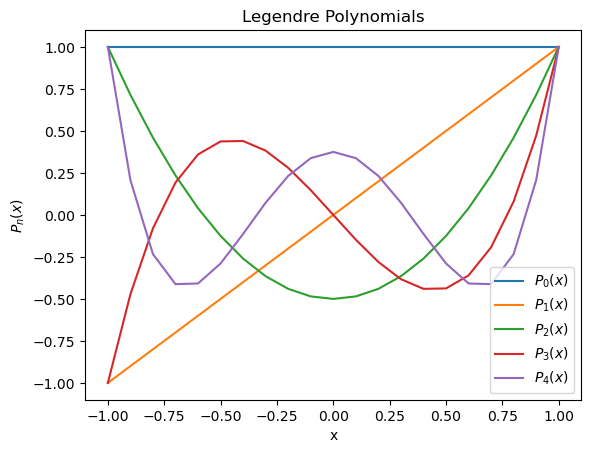

In [3]:
n = 5
X = np.linspace(-1,1,21)
print(X)
for i in range(n):
    y = eval_legendre(i, X)
    print(y)
    plt.plot(X, y, label=r'$P_{}(x)$'.format(i))

plt.title("Legendre Polynomials")
plt.xlabel("x")
plt.ylabel(r'$P_n(x)$')
plt.legend(loc='lower right')
plt.show()

## Introducing the Gauss-Legendre quadrature

There is a very convenient and accurate way to calculate integrals using Legendre polynomials ... [Gauss-Legendre quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature)

[Numerical quadrature](https://en.wikipedia.org/wiki/Numerical_integration) approximates an integral of a function $f(x)$ over an interval (for now we pick $[-1,1]$) as a weighted sum of the function evaluated at some special points.
$$\int_{-1}^{1} f(x) dx = \sum_{i=1}^n \omega_i f(x_i) + O(\varepsilon)$$
* $\omega_i$ are numbers called the weights
* $x_i$ are numbers called the points or roots

There's a zillion different quadrature rules.  The cool thing about Gauss-Legendre quadrature is that if you use $n$ points you can *exactly* integrate polynomials of degree up to and including $2n-1$. 

Let's try it.  First calculate the points and weights for n as set above (it was 5) (look [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html) for documentation) and show that it can indeed integrate everything up to $x^{2n-1}$ but cannot integrate $x^{2n}$.  We'll do this by numerically calcuating
$$\int_{-1}^{1} (1+x)^i dx = \frac{2^{i+1}}{i+1}$$

In [4]:
roots, weights = roots_legendre(n)
print(roots)
print(weights)
print(sum(weights))

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
2.0


In [5]:
(roots+1)**2

array([0.00880222, 0.21301058, 1.        , 2.36688782, 3.63352161])

In [6]:
print("%d point rule should be exact up to degree %d" % (n, 2*n-1))
x = roots # just to make the code a bit more readable
print(" n     approx     exact      error")
for i in range(2*n+1):
    approx= np.dot((x+1)**i,weights)
    exact = 2**(i+1) / (i+1)
    err = abs(exact - approx)
    print("%2d %10.6f %10.6f %10.2e" % (i, approx, exact, err))


5 point rule should be exact up to degree 9
 n     approx     exact      error
 0   2.000000   2.000000   0.00e+00
 1   2.000000   2.000000   2.22e-16
 2   2.666667   2.666667   4.44e-16
 3   4.000000   4.000000   8.88e-16
 4   6.400000   6.400000   2.66e-15
 5  10.666667  10.666667   5.33e-15
 6  18.285714  18.285714   1.07e-14
 7  32.000000  32.000000   2.84e-14
 8  56.888889  56.888889   4.26e-14
 9 102.400000 102.400000   9.95e-14
10 186.178886 186.181818   2.93e-03


This code
```
approx= np.dot((x+1)**i,weights)
```
to evaluate the integral is a bit opaque since it is using NumPy to make the calculation fast since NumPy can operate on an entire vector.  It is exactly the same as doing the following.

In [7]:
def f(x):
    return (1+x)**i

i = 5
result = 0.0
for j in range(n):
    result = result + weights[j]*f(x[j])

approx= np.dot((x+1)**i,weights)
print(result, approx)

10.66666666666666 10.66666666666666


## Orthogonality of Legendre polynomials

Imagine if you have a product of two degree $n-1$ polynomials — this product is itself a polynomial of degree $2n-2$.  For instance, we can exactly calculate using $n$-order GL quadrature the integral of the product of two Legendre polynomials
$$\int_{-1}^{1} P_i(x) P_j(x) dx $$
where $i \leq n$ and $j \leq n$.  

This integral of the product of two Legendre polynomials always evaluates to $0$ unless $i=j$. 

Let's reproduce the "orthogonality relation" in Equation 23 [here](https://mathworld.wolfram.com/LegendrePolynomial.html)

In [8]:
print(" i  j     approx     exact      error")
for i in range(n):
    Pi = eval_legendre(i, roots)
    for j in range(n):
        Pj = eval_legendre(j, roots)
        approx = np.dot(Pi*Pj,weights)
        if i == j:
            exact = 2/(2*i+1)
        else:
            exact = 0.0
        err = approx - exact
        print("%2d %2d %10.6f %10.6f %10.2e" % (i, j, approx, exact, err))

 i  j     approx     exact      error
 0  0   2.000000   2.000000   0.00e+00
 0  1   0.000000   0.000000   0.00e+00
 0  2  -0.000000   0.000000  -2.78e-16
 0  3  -0.000000   0.000000  -2.78e-17
 0  4  -0.000000   0.000000  -1.25e-16
 1  0   0.000000   0.000000   0.00e+00
 1  1   0.666667   0.666667  -2.22e-16
 1  2   0.000000   0.000000   6.94e-18
 1  3  -0.000000   0.000000  -1.80e-16
 1  4   0.000000   0.000000   5.55e-17
 2  0  -0.000000   0.000000  -2.78e-16
 2  1   0.000000   0.000000   6.94e-18
 2  2   0.400000   0.400000  -2.22e-16
 2  3   0.000000   0.000000   1.37e-16
 2  4  -0.000000   0.000000  -2.36e-16
 3  0  -0.000000   0.000000  -2.78e-17
 3  1  -0.000000   0.000000  -1.80e-16
 3  2   0.000000   0.000000   1.37e-16
 3  3   0.285714   0.285714  -1.67e-16
 3  4   0.000000   0.000000   1.11e-16
 4  0  -0.000000   0.000000  -1.25e-16
 4  1   0.000000   0.000000   5.55e-17
 4  2  -0.000000   0.000000  -2.36e-16
 4  3   0.000000   0.000000   1.11e-16
 4  4   0.222222   0.22222

## Expanding integration range with change of variables

Finally, we need to calculate integrals over a general range $[a,b]$. E.g., 
$$\int_a^b f(t) dt$$
so we need to do a change of variables to map this back onto the integral $[-1,1]$ that we can use with Gauss Legendre quadrature.  Defining,
$$t = \frac{b-a}{2} x + \frac{a + b}{2}$$
we have
$$\int_a^b f(t) dt = \frac{b-a}{2} \int_{-1}^1f(\frac{b-a}{2} x + \frac{a + b}{2}) dx$$
Hence, if we have the GL points $x_i$ and weights $\omega_i$ for $[-1,1]$ we can integratate over the integral $[a,b]$ using
$$\int_a^b f(t) dt \approx \sum_i u_i f(t_i)$$
with 
* $t_i = \frac{b-a}{2} x_i + \frac{a + b}{2}$, and
* $u_i = \frac{b-a}{2} \omega_i$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html

Let's do this integral
$$\int_2^3 \sin(t) dt = [\cos(t)]_2^3 = \cos(2)-\cos(3) \approx 0.5738456600533031$$

In [9]:
n = 3
roots, weights = roots_legendre(n)
a = 2
b = 3
t = (b-a)/2 * roots + (a+b)/2
u = (b-a)/2 * weights
approx = np.dot(np.sin(t),u)
exact = math.cos(a)-math.cos(b)
print(approx,exact,exact-approx)

0.5738459546544643 0.5738456600533031 -2.946011612436905e-07


The numerical integral is not exact since $\sin(x)$ is not exactly approximated by a polynomial of degree $2n-1$. 
* But we can use a higher order quadrature to get more accuracy

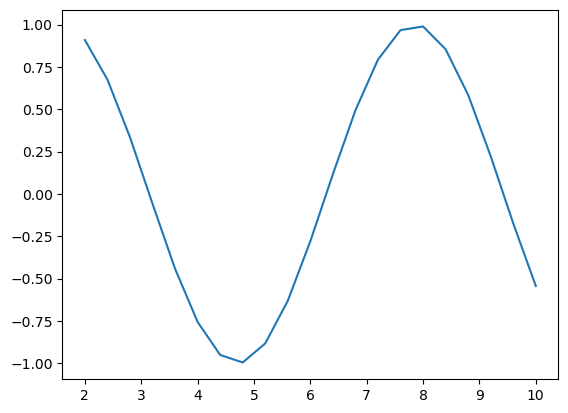

In [10]:
X = np.linspace(2,10,21)
plt.plot(X,np.sin(X))

In [11]:
a = 2
b = 10 # use a bigger range to make it harder
print(" n      approx             exact           error")
for n in range(1,12):
    roots, weights = roots_legendre(n)
    t = (b-a)/2 * roots + (a+b)/2
    u = (b-a)/2 * weights
    approx = np.dot(np.sin(t),u)
    exact = math.cos(a)-math.cos(b)
    err = approx-exact
    print("%2d %18.15f %18.15f %10.2e" % (n, approx, exact, err))

 n      approx             exact           error
 1 -2.235323985591407  0.422924692529310  -2.66e+00
 2  1.504947313471988  0.422924692529310   1.08e+00
 3  0.247210399427349  0.422924692529310  -1.76e-01
 4  0.437030697792960  0.422924692529310   1.41e-02
 5  0.422247256972586  0.422924692529310  -6.77e-04
 6  0.422946382889693  0.422924692529310   2.17e-05
 7  0.422924195802881  0.422924692529310  -4.97e-07
 8  0.422924701076322  0.422924692529310   8.55e-09
 9  0.422924692414705  0.422924692529310  -1.15e-10
10  0.422924692530540  0.422924692529310   1.23e-12
11  0.422924692529300  0.422924692529310  -1.00e-14


### Differentiating Legendre by recurrence identity

The derivative of a Legendre polyn can be computed from this recurrence
$$(2l+1) P_l(x) = \frac{d}{dx}\left( P_{l+1}(x) - P_{l-1}(x) \right)$$
Using prime to denote derivative, dropping the $(x)$ and then rearranging with $l\rightarrow l-1$
$$\begin{aligned}
(2l+1) P_l &= P'_{l+1} - P'_{l-1} \\
P'_{l+1} &= (2l+1) P_l + P'_{l-1} \\
P'_{l} &= (2l-1) P_{l-1} + P'_{l-2}
\end{aligned}$$
Remember also
$$
P_0(x) = 1 \ \ \implies \ \ P'_0 = 0 \\
P_1(x) = x \ \ \implies \ \ P'_1 = 1
$$
Let's test the formula comparing against a central derivative approximation

In [12]:
# a routine to compute a derivative using central difference approximation
def diff1(f,x,h=1e-6):
    return (f(x+h)-f(x))/h

def diff(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

print(diff1(math.sin,0.1),diff(math.sin,0.1),math.cos(0.1))

0.9950041153644618 0.9950041652759256 0.9950041652780258


In [13]:
# a routine to recursively calculate the derivative of a Legendre polyn using the recurrence
# Note, that this will be slow for large l --- why?  What is the complexity of the algorithm?
def diffP(l, x):
    if l == 0:
        return 0.0
    elif l == 1:
        return 1.0
    else:
        return (2*l-1)*eval_legendre(l-1,x) + diffP(l-2,x)
      

In [14]:
xtest = 0.8
l = 7
drecur = diffP(l,xtest)
dnumer = diff(lambda x: eval_legendre(l,x), xtest)
print(drecur, dnumer)

-3.890347999999999 -3.890347999954691


In [15]:
# Compute the derivatives of all Legendre polynomials [0,n) at the point x
# This is O(n) times faster than using the original algorithm since it only
# evaluates the polynomials once.
def diffP2(n,x):
    P = eval_legendre(range(n-1),x)
    dP = np.zeros(n)
    dP[0] = 0
    if n == 1:
        return
    dP[1] = 1
    for l in range(2,n):
        dP[l] = (2*l-1)*P[l-1] + dP[l-2]
    
    return dP

(note by Daniel: these `timeit`s are quite slow so I commented them out)

In [16]:
# %timeit dd = [diffP(l,0.125) for l in range(20)]

In [17]:
# %timeit d = diffP2(20,0.125)

In [18]:
d = diffP2(6,0.125)
dd = [diffP(l,0.125) for l in range(6)]
print(d)
print(dd)

[ 0.          1.          0.375      -1.3828125  -0.90332031  1.47445679]
[0.0, 1.0, 0.375, -1.3828125, -0.9033203124999991, 1.474456787109375]


Notice that the new way is also more accurate though I cannot explain why!
* (note by Daniel: I think the accuracy is the same, less digits are displayed in `d` only because it is a numpy array, while `dd` is only a list)

Using the recursion one can derive that
$$P_n'(x) = (2n-1) P_{n-1}(x) + (2n-3) P_{n-3}(x) + \cdots$$
which we test below.  This form is also useful if we want to analytically compute integrals involving derivatives.

In [19]:
def diffP3(n,x):
    P = eval_legendre(range(n+1),x)
    s = 0.0
    for l in range(n-1,-1,-2):
        s += (2*l+1)*P[l]
    return s

print(diffP(9,0.1),diffP3(9,0.1))

1.4471087027343752 1.4471087027343752


## Calculating KE with integration by parts

Now we need to calculate the kinetic energy integrals

$$t_{ij} = \int_{-1}^1 P_i(x) \frac{d^2 P_j}{dx^2} (x) dx$$

Stopping to think and to ask yourself what do we already know and what do we expect is always a good place to start
* We know that the second derivative of a polynomial of degree $n$ is a polynomial of degree $n-2$.
* We know that a polynomial of degree $n$ can be exactly expanded in terms of Legendre polynomials $P_l(x)$ for $l=0,\ldots,n$.
* We know that the second derivative of an even (meaning $p(x)=p(-x)$) polynomial is also even.
* We know that Legendre polynomials are orthogonal.  So if $p(x)$ is a polynomial of degree $j-2$, then $\int_{-1}^1 P_i(x) p(x) dx$ is zero unless $i \le j-2$.
* Thus, we already can infer the integral is zero unless
  * $i \le j-2$, and
  * $i$ and $j$ are noth both even or both odd
* Also note that the matrix will not be symmetric since $t_{ij} \ne t_{ji}$ unless $i=j$.

So far, we can only compute the first derivative (though we could get the second with a little more work).  More significantly, we cannot easily enforce boundary conditions in the above form.

We can use integration by parts
$$\int U dV = [UV] - \int V dU$$
with $U=P_i$ and $dV = \frac{d^2 P_j}{dx^2} dx$ to rearrange, obtaining
$$
t_{ij} = \left[P_i(x) \frac{dP_j}{dx} (x) \right]_{-1}^1 - \int_{-1}^1 \frac{dP_i}{dx}(x) \frac{dP_j}{dx} (x) dx \\
 = P_i(1)P_j'(1) - P_i(-1)P_j'(-1) - \int_{-1}^1 P_i'(x) P_j'(x) dx
 $$
in which we introduced $P_i'(x) = \frac{dP_i}{dx}(x)$.

Applying the same thinking as above, we can see that $\int_{-1}^1 P_i'(x) P_j'(x) dx$ is 
* zero unless $i$ and $j$ are either both even or both odd
* symmetric in exchanging $i$ and $j$.

We also have 
$$P_i(1) = 1\ \ \forall i$$
and 
$$P_i(-1) = (-1)^i$$
(i.e., even $i$ is +1 and odd $i$ is -1).

Finally, a little bit of Googling or knowing the right text book will find
$$\frac{dP_i}{dx} (1) = \frac{i(i+1)}{2}$$ 
and
$$\frac{dP_i}{dx} (-1) = (-1)^{i+1}\frac{i(i+1)}{2}$$ 

Finally, if we want to avoid numerical computation of these integrals we can use the formula above for $P_n'(x)$ to compute
$$
\int_{-1}^1 P_i'(x) P_j'(x) dx = l (l+1) \quad \text{with}\ l=\min(i,j)
$$
for $i,j$ both even or both odd.

However, since we need to compute other types of integrals and we want to use other basis functions we won't use this knowledge except to check our answers.

Problem:
* Use GL quadrature to evaluate $\int_{-1}^1 P_i'(x) P_j'(x) dx$ for $i,j=0,1,\ldots,6$ and test against the known value.
* What order quadrature do you need to compute accurately?

**(Following is my solution for this part – Daniel)**

In [20]:
n = 6 # i,j = 0,1,2,…,n

order = 7 # P' degree 5, P'*P' degree 10, by the 2n-1 rule we will need order 6

roots, weights = roots_legendre(order)

Px = np.array([eval_legendre(i, roots) for i in range(n+1)])
dPx = np.zeros((n+1, order))
dPx[1] = np.ones(order)

for i in range(2,n+1):
    dPx[i] = (2*i-1) * Px[i-1] + dPx[i-2]

print(dPx)

[[  0.           0.           0.           0.           0.
    0.           0.        ]
 [  1.           1.           1.           1.           1.
    1.           1.        ]
 [ -2.84732374  -2.22459356  -1.21753545   0.           1.21753545
    2.22459356   2.84732374]
 [  5.25604372   2.62401374  -0.26467285  -1.5         -0.26467285
    2.62401374   5.25604372]
 [ -7.84352461  -1.57404731   1.87401839   0.          -1.87401839
    1.57404731   7.84352461]
 [ 10.1797357   -0.65380555  -1.38042181   1.875       -1.38042181
   -0.65380555  10.1797357 ]
 [-11.84343941   2.95545462  -1.01629957   0.           1.01629957
   -2.95545462  11.84343941]]


In [21]:
s = np.zeros((n+1, n+1))

for i in range(n+1):
    for j in range(n+1):
        #print(dPx[i] * dPx[j])
        s[i, j] = np.dot(dPx[i] * dPx[j], weights)

print(np.array_str(s, precision=3, suppress_small=True))

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  2. -0.  2. -0.]
 [ 0.  0.  6.  0.  6. -0.  6.]
 [ 0.  2.  0. 12. -0. 12. -0.]
 [ 0. -0.  6. -0. 20. -0. 20.]
 [ 0.  2. -0. 12. -0. 30. -0.]
 [ 0. -0.  6. -0. 20. -0. 42.]]


In [22]:
s_exact = np.zeros((n+1, n+1))

for i in range(n+1):
    for j in range(n+1):
        if i % 2 == j % 2:
            l = min(i,j)
            s_exact[i,j] = l*(l+1)

error = s_exact - s

print(np.array_str(error, precision=2))

[[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00 -6.94e-17 -2.66e-15  2.22e-16 -4.44e-15  2.89e-15]
 [ 0.00e+00 -6.94e-17 -2.66e-15  0.00e+00 -8.88e-15  2.66e-15 -7.99e-15]
 [ 0.00e+00 -2.66e-15  0.00e+00 -1.07e-14  2.66e-15 -1.42e-14  1.42e-14]
 [ 0.00e+00  2.22e-16 -8.88e-15  2.66e-15 -1.42e-14  1.42e-14 -1.42e-14]
 [ 0.00e+00 -4.44e-15  2.66e-15 -1.42e-14  1.42e-14 -1.42e-14  4.26e-14]
 [ 0.00e+00  2.89e-15 -7.99e-15  1.42e-14 -1.42e-14  4.26e-14 -7.11e-15]]


## Boundary conditions in the harmonic oscillator

A quick detour into boundary conditions.  You'll see why in a little bit.

Consider a simple first-order differential equation
$$
   \frac{df}{dx}(x) = p(x)
$$
We can easily integrate to obtain
$$
   f(x) = \int p(x) dx + C
$$
where $C$ is the constant of integration.  How to determine $C$?  
* We provide a boundary condition that at $x=x_0$ specifies the value of $f(x_0)$.

For a second-order equation we are going to have two constants of integration, which we determine by providing two boundary conditions that can be either the value or the derivative of the solution.

### Classical harmonic oscillator
The equation for the classical harmonic oscillator starts with Newton's second law ($F = m a$).  The energy of a spring with force constant $k$ stretched from its equilibrium point by $x$ is
$$
   V(x) = \frac{1}{2} k x^2
$$
and hence the force is
$$
  F(x) = -\frac{dV}{dx}(x) = - k x
$$
Thus, using the definition of the acceleration ($a$) the equation becomes
$$
  m \frac{d^2 x}{dt^2}(t) = - k x (t)
$$
This can be integrated to yield
$$
  x(t) = A \sin(\omega t) + B \cos(\omega t)
$$
where $\omega = \sqrt{k/m}$ is the angular frequency and $A$ and $B$ are constants of integration.
* Verify this by substitution if you have not done this before.

Specifying two boundary conditions
* $x(0) = 0$ (i.e, the particle is at the origin at time zero) implies $B=0$
* The amplitude of vibration is $X$ (when $t=\pi/2, 3\pi/2, \ldots $) implies $A = X$
and the solution becomes
$$
  x(t) = X \sin(\omega t)
$$

### Quantum harmonic oscillator
In the quantum mechanics formulation of the harmonic oscillator, we know that the particle is localized near the equilibrium position --- there is zero probability of it going to infininity since it would take an infinite energy to stretch the spring.  Thus, we demand that our wave function goes to zero at long range.  I.e., if $\psi(x)$ is our wave function
$$\psi(\pm \infty) = 0 $$
Since we are computing in the finite box $[-L,L]$ we in practice use
$$\psi(\pm L) = 0 $$

What does this mean for our basis set selection and also the kinetic energy integrals?
Our quantum mechanical energy $E$ is computed via
$$
  E \int \psi(x)  \psi(x) dx = \int \psi(x) \hat{H} \psi(x) dx
$$
where our Hamiltonian is 
$$
  \hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + V(x)
$$
Focusing on the kinetic energy piece we can again integrate by parts to obtain
$$
  E_{\textrm{kinetic}} \int \psi(x) \psi(x) dx = -\frac{1}{2} \int \psi(x) \frac{d^2}{dx^2} \psi(x) dx \\
  = \left[\psi(x) \frac{d\psi}{dx}(x)\right] _{-L}^{L} + \frac{1}{2} \int \frac{d\psi}{dx}(x) \frac{d\psi}{dx}(x) dx \\
  = \frac{1}{2} \int \frac{d\psi}{dx}(x) \frac{d\psi}{dx}(x) dx
$$
where the last line follows from applying the boundary conditions of zero. 



## Expressing in energy in finite basis functions

We are expanding $\psi$ in terms of the basis functions $b_l(x) = P_l(x/L)$
$$
\psi(x) = \sum_{l=0}^{n-1} b_l(x) c_l
$$
where the simulation box is $\pm L$.  Substituting this into the energy expression we obtain.

$$
  E \sum_{lm} \left\langle l \middle| m \right\rangle c_l c_m = \sum_{lm} \left\langle l \middle| -\frac{1}{2} \frac{d^2}{dx^2} \middle| m \right\rangle c_l c_m + \sum_{lm} \left\langle l \middle| \frac{1}{2} \omega x^2 \middle| m \right\rangle c_l c_m \\
 = \frac{1}{2} \sum_{lm} \left\langle \frac{db_l}{dx}  \middle| \frac{db_m}{dx} \right\rangle c_l c_m + \sum_{lm} \left\langle l \middle| \frac{1}{2} \omega x^2 \middle| m \right\rangle c_l c_m
$$
Cleaning this up ($h$ is the Hamiltonian matrix for energy, $s$ is the overlap matrix)
$$
 \sum_{lm} c_l (h_{lm} - E s_{lm}) c_m = 0
 $$

To find the lowest energy state, minimize w.r.t. $c$. To do this, differentiate w.r.t $c_l$
$$
  \frac{dE}{dc_l} = \frac{2}{Q} \sum_{m} (h_{lm} - E s_{lm}) c_m
$$
where $Q$ is the square of the norm of the wave function ($\Vert \psi \Vert^2$)
$$
Q=\sum_{m m'} c_m s_{m m'} c_{m'}
$$
We will want to solve
$$
  \frac{dE}{dc_l} = 0
$$
to find the minimimum.

### Code for the overlap matrix $s$

In [23]:
# This sets up the quadrature
n = 7 # order
roots, weights = roots_legendre(n)
epsilon = 1e-13 # threshold for error

# Reuseable matrix of Legendre polynomials
# P[i,j] = P_i(x_j), where x_j is the j-th root of P_n
P = np.array([eval_legendre(i, roots) for i in range(n+1)])

# Reuseable matrix of P'
# generated by recurrence identity
dP = np.zeros((n+1, n))
dP[1] = np.ones(n)
for i in range(2,n+1):
    dP[i] = (2*i-1) * P[i-1] + dP[i-2]

In [24]:
# Calculates matrix s

int_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx = np.dot(P[i]*P[j], weights)
        if abs(approx) < epsilon:
            approx = 0
        int_matrix[i,j] = approx
print(int_matrix)

[[2.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.66666667 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.4        0.         0.         0.
  0.        ]
 [0.         0.         0.         0.28571429 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.22222222 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.18181818
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.15384615]]


### Code for the energy matrix $h$

In [25]:
# Calculates the KE term for h
# Note this includes the 1/2 in the front!

ke_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx_ke = np.dot(dP[i]*dP[j], weights) / 2
        if abs(approx_ke) < epsilon:
            approx_ke = 0
        ke_matrix[i,j] = approx_ke
print(ke_matrix)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  3.  0.  3.  0.  3.]
 [ 0.  1.  0.  6.  0.  6.  0.]
 [ 0.  0.  3.  0. 10.  0. 10.]
 [ 0.  1.  0.  6.  0. 15.  0.]
 [ 0.  0.  3.  0. 10.  0. 21.]]


In [26]:
# Calculates the PE term for h

omega = 2.0
pe_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx_pe = np.dot(P[i] * P[j] * 0.5 * omega**2 * roots**2, weights)
        if abs(approx_pe) < epsilon:
            approx_pe = 0
        pe_matrix[i,j] = approx_pe
print (pe_matrix)

[[1.33333333 0.         0.53333333 0.         0.         0.
  0.        ]
 [0.         0.8        0.         0.22857143 0.         0.
  0.        ]
 [0.53333333 0.         0.41904762 0.         0.15238095 0.
  0.        ]
 [0.         0.22857143 0.         0.29206349 0.         0.11544012
  0.        ]
 [0.         0.         0.15238095 0.         0.22510823 0.
  0.09324009]
 [0.         0.         0.         0.11544012 0.         0.18337218
  0.        ]
 [0.         0.         0.         0.         0.09324009 0.
  0.077461  ]]


### Expanding intergration range for energy calculation

For the integrals, it is easiest to evaluate them over $[-1,1]$.  So do a change of variables $x = Ly$, so $dx = L dy$.  For the derivative use the chain rule
$$
   \frac{d}{dx} f(x) = \frac{dy}{dx} \frac{d}{dy} f(L y) = \frac{1}{L} \frac{d}{dy} f(L y)
$$
Since $b_l(x) = P_l(x/L)$ we have $b_l(L y) = P_l(y)$. 

The kinetic energy integral becomes
$$
\left\langle \frac{db_l}{dx}  \middle| \frac{db_m}{dx} \right\rangle = \int_{-L}^L\frac{db_l}{dx} \frac{db_m}{dx}  dx 
= \frac{1}{L} \int_{-1}^1 P_l^\prime(y) P_m^\prime(y) dy
$$
and the potential energy integral
$$
\left\langle l  \middle| \frac{1}{2} \omega^2 x^2 \middle| m \right\rangle = \int_{-L}^L b_l(x) \frac{1}{2} \omega^2 x^2  b_m(x)  dx \
= \frac{1}{2} \omega^2 L^3 \int_{-1}^1 P_l(y)  y^2  P_m(y)  dy
$$

## Projecting a function into the Legendre basis

It's also useful to be able to project a general function into the Legendre polynomial basis, i.e., given a function $f(x)$ defined in the interval $[-L,L]$ compute an approximation of the form
$$
f(x) \approx \sum_{l=0}^{n-1} f_l P_l(x/L)
$$
Multiplying from the left by $P_m(x)$, integrating, using the orthogonality of Legendre polynomials and the known value of the integral of a square of the polynomial
$$
f_l = \frac{2l+1}{2} \int_{-1}^{1} f(L y) P_l(y) dy
$$

Let's try this to approximate $f(x) = \sin(x)$ over $[-8,8]$

In [27]:
n = 50
for z in range(n):
    roots, weights = roots_legendre(z+1)
L = 8.0
f = np.zeros(n)
for l in range(n):
    Pl = eval_legendre(l,roots)
    f[l] = ((2*l+1)/2)*np.dot(np.sin(L*roots)*Pl,weights)

print(f)
fit = lambda x : np.dot(eval_legendre(range(n),x/L),f)
fit(0.1),math.sin(0.1)

[ 0.00000000e+00  1.00938680e-01  4.22838847e-17  7.21378038e-01
 -3.12250226e-17  1.39198642e+00 -3.77736037e-16 -1.83409067e+00
  6.63531730e-17  7.51101079e-01 -5.00901404e-16 -1.62091289e-01
 -5.52943108e-16  2.20906691e-02  2.51534904e-16 -2.09380190e-03
  7.15573434e-16  1.46723741e-04 -8.98586761e-16 -7.93297295e-06
  1.77809156e-17  3.41577933e-07 -1.17093835e-16 -1.20036692e-08
 -1.72127937e-15  3.50900837e-10 -1.56298585e-15 -8.81567389e-12
  4.44956572e-16  7.23093460e-14  1.69309011e-15 -9.48616186e-14
 -1.01481323e-15 -9.53057078e-14 -2.27422248e-15 -1.07954444e-13
  1.47212971e-15 -1.07417330e-13 -1.33573708e-16 -9.42685600e-14
 -1.29974156e-15 -7.65039616e-14 -1.17961196e-15 -4.77098829e-14
 -2.00707506e-15 -2.45866695e-14  3.79123816e-15 -2.40297148e-14
  1.51441359e-15 -2.30128416e-14]


(0.09983341664682743, 0.09983341664682815)

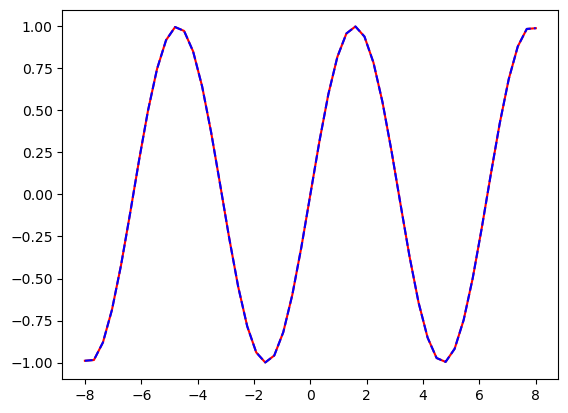

In [28]:
X = np.linspace(-L,L,51)
F = [fit(x) for x in X]
plt.plot(X,F,"r",X,np.sin(X),"b--")

## Verifiying the coefficients in the numerical code

In preparation for debugging the numerical code, verify by substitution into 
$$
-\frac{1}{2} \frac{d^2}{dx^2} \psi(x) + \frac{1}{2} \omega^2 x^2 \psi(x) = E \psi(x)
$$
that the exact solution is
$$
\psi(x) = e^{-\frac{\omega x^2}{2}}
$$
with eigenvalue 
$$E = \frac{\omega}{2}$$

We will use $\omega=2$ and $L=8$ (chosen so that $\psi(\pm L)$ is very small).

The overlap integral is
$$\left\langle \psi \middle| \psi \right\rangle = \sqrt{\frac{\pi}{\omega}}$$

Using the projection method we just tested on $\sin(x)$ compute a polynomial approximation to $\psi(x)$ and verify it by computing the error at a few points and by plotting both functions (the fit and the original function).

In [29]:
n = 50
roots, weights = roots_legendre(n)
omega = 2.0
L = 8.0
f = np.zeros(n)

psi = lambda x: (math.e)**(-0.5*omega*x**2)

for l in range(n):
    Pl = eval_legendre(l,roots)
    f[l] = ((2*l+1)/2)*np.dot(psi(L*roots)*Pl,weights)
print(f)
fit2 = lambda x : np.dot(eval_legendre(range(n),x/L),f)
fit2(-6.1),psi(-6.1)

[ 1.10778366e-01  0.00000000e+00 -2.70454994e-01  5.91974386e-17
  3.45466532e-01 -6.44016090e-17 -3.81245651e-01  1.69135539e-16
  3.87559943e-01 -2.18358318e-16 -3.70992986e-01  2.69315820e-16
  3.37886624e-01 -2.45897053e-16 -2.94479339e-01  3.36102673e-16
  2.46479005e-01 -3.33934269e-16 -1.98614261e-01  3.72098186e-16
  1.54355519e-01 -4.10262102e-16 -1.15854734e-01  5.09575021e-16
  8.40755658e-02 -5.52943108e-16 -5.90470654e-02  5.00901404e-16
  4.01656419e-02 -5.11743425e-16 -2.64823690e-02  4.78133158e-16
  1.69353803e-02 -3.99528501e-16 -1.05108456e-02  4.27229866e-16
  6.33479076e-03 -3.69983991e-16 -3.70928204e-03  3.59738281e-16
  2.11061380e-03 -4.13948389e-16 -1.16610440e-03  4.15032592e-16
  6.22297437e-04 -4.73579509e-16 -3.12779582e-04  4.53196508e-16
  1.29706572e-04 -4.72278466e-16]


(-6.460751000969545e-06, 6.916753975541505e-17)

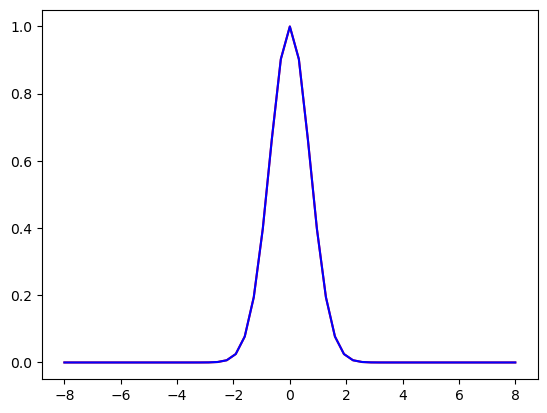

In [30]:
X = np.linspace(-L,L,51)
F = [fit2(x) for x in X]
plt.plot(X,F,"r",X,psi(X),"b")

## Numerically computing the energy function

Now you can use the polynomial coefficients ($c$) used to fit $\psi$ and your numerically computed matrix elements to compute
* The overlap integral $\left\langle \psi \middle| \psi \right\rangle = \sum_{lm} c_l s_{lm} c_l$
* Compare with the exact answer from above
* The energy integral $\left\langle \psi \middle| \hat{H} \middle| \psi \right\rangle = \sum_{lm} c_l h_{lm} c_l$
* And hence the energy $E=\left\langle \psi \middle| \hat{H} \middle| \psi \right\rangle / \left\langle \psi \middle| \psi \right\rangle$
* Compare again with the exact answer from above

If you get to here, you now know that your matrices are all correct.  Good job!

Now we get to actually do try to minimize the energy.

In [31]:
#Overlap Integral
n = 50 # setting up the order
omega = 2.0
L = 8.0
epsilon = 1e-13 # threshold for error
roots, weights = roots_legendre(n)
P = np.array([eval_legendre(i, roots) for i in range(n+1)])

int_matrix = np.zeros((n,n)) #setting up overlap matrix
for i in range(n):
    for j in range(n):
        approx = np.dot(P[i]*P[j], weights) #GL quadrature
        if abs(approx) < epsilon:
            approx = 0
        int_matrix[i,j] = approx #inserting matrix elements
overlap_exact=(math.pi/omega)**0.5
overlap_estimate = np.dot(f, np.dot(int_matrix, f)) * L
print (overlap_exact, overlap_estimate, overlap_exact-overlap_estimate)


1.2533141373155001 1.253314124628794 1.2686706130082825e-08


In [32]:
#Energy Integral
n = 50 # order
L = 8.0
roots, weights = roots_legendre(n)
epsilon = 1e-13 # threshold for error
# Reuseable matrix of Legendre polynomials
# P[i,j] = P_i(x_j), where x_j is the j-th root of P_n
P = np.array([eval_legendre(i, roots) for i in range(n+1)])

# Reuseable matrix of P'
# generated by recurrence identity
dP = np.zeros((n+1, n))
dP[1] = np.ones(n)
for i in range(2,n+1):
    dP[i] = (2*i-1) * P[i-1] + dP[i-2]

# Calculates the KE term for h

ke_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx_ke = np.dot((dP[i]*dP[j]), weights)*0.5
        if abs(approx_ke) < epsilon:
            approx_ke = 0
        ke_matrix[i,j] = approx_ke

# Calculates the PE term for h

omega = 2.0
pe_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx_pe = np.dot(P[i] * P[j] * 0.5 * omega**2 * (roots)**2, weights)
        if abs(approx_pe) < epsilon:
            approx_pe = 0
        pe_matrix[i,j] = approx_pe

ke_elements = np.zeros(shape=(n,n))
pe_elements = np.zeros(shape=(n,n))
ke_integral = 0
pe_integral = 0
#for l in range (n): <- less efficient, keeping as reference
    #for m in range (n):
        #ke_integral += f[l]*f[m]*ke_matrix[l,m]/L
        #pe_integral += f[l]*f[m]*pe_matrix[l,m]*L**3

ke_integral = np.dot(f, np.dot(ke_matrix, f))/L
pe_integral = np.dot(f, np.dot(pe_matrix, f))*L**3

energy_integral = ke_integral + pe_integral
energy_approx = energy_integral/overlap_exact
energy_exact = omega/2

ke_approx = ke_integral/overlap_exact
pe_approx = pe_integral/overlap_exact
print(ke_approx, pe_approx)
print(energy_approx, energy_exact)

0.49999997706952387 0.5000001732094158
1.0000001502789397 1.0


In [33]:
print(np.array_str(ke_matrix, precision=3, suppress_small=True))
print(np.array_str(pe_matrix, precision=3, suppress_small=True))

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    1.    0. ...    1.    0.    1.]
 [   0.    0.    3. ...    0.    3.    0.]
 ...
 [   0.    1.    0. ... 1128.   -0. 1128.]
 [   0.    0.    3. ...   -0. 1176.   -0.]
 [   0.    1.    0. ... 1128.   -0. 1225.]]
[[1.333 0.    0.533 ... 0.    0.    0.   ]
 [0.    0.8   0.    ... 0.    0.    0.   ]
 [0.533 0.    0.419 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.021 0.    0.01 ]
 [0.    0.    0.    ... 0.    0.021 0.   ]
 [0.    0.    0.    ... 0.01  0.    0.01 ]]


## Minimizing functions using SciPy

But first another detour into using the [SciPy minimzation routine](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

Let's minimize the function $f(c) = \sum_{i=0}^3 (c_i-i)^2$ where $c$ is a 4-dimensional vector.  The derivative is easily computed as
$$\frac{df}{dc_i} = 2(c_i-i)$$
and the minimum is at $c_i = i$ at which the function is zero.

We need to define functions to compute the energy and gradient as a function of $c$

In [34]:
def energy(c):
    i = np.arange(c.shape[0])
    return np.sum((c-i)**2)

def gradient(c):
    i = np.arange(c.shape[0])
    return 2*(c-i)


c = np.random.random(4)
c, energy(c), gradient(c)

(array([0.81792738, 0.31447479, 0.63004241, 0.74808698]),
 8.086846063252509,
 array([ 1.63585476, -1.37105041, -2.73991518, -4.50382604]))

Starting from a random initial guess  we minimize using the Conjugate Gradient (CG) method.

In [35]:
c0 = np.random.random(4)
result = scipy.optimize.minimize(energy, c0, jac=gradient, method="CG")
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 4.5606021083089745e-31
       x: [ 1.110e-16  1.000e+00  2.000e+00  3.000e+00]
     nit: 1
     jac: [ 2.220e-16 -4.441e-16 -8.882e-16 -8.882e-16]
    nfev: 3
    njev: 3


## Minimizing the energy of the system

OK ... now minimize your harmonic oscillator energy function.

In [36]:
def energy(c):
    L = 8.0
    overlap_integral = np.dot(c, np.dot(int_matrix, c)) * L
    ke_integral = np.dot(c, np.dot(ke_matrix, c)) / L
    pe_integral = np.dot(c, np.dot(pe_matrix, c)) * L**3
    return (ke_integral + pe_integral) / overlap_integral

In [37]:
def gradient(c):
    L = 8.0
    h_matrix = ke_matrix / L + pe_matrix * L**3
    integral = np.dot(h_matrix - energy(c) * int_matrix * L, c)
    overlap_integral = np.dot(c, np.dot(int_matrix, c)) * L
    return 2 * integral / overlap_integral

In [38]:
np.random.seed(1000)
c0 = np.random.random(n)
result = scipy.optimize.minimize(energy, c0, jac=gradient, method="CG")
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.000000063294915
       x: [ 2.354e+00  1.269e-05 ...  2.225e-03  3.745e-06]
     nit: 177
     jac: [-4.649e-06  4.151e-06 ...  1.523e-07  1.360e-06]
    nfev: 267
    njev: 267


In [39]:
result.fun - energy_approx

-8.698402464979438e-08

In [40]:
energy(result.x)

1.000000063294915

## Implementation of minimization algorithms

### Steepest descent with constant step

In [41]:
def steepest_descent(function, gradient, c0):
    p = 1
    epsilon = 1e-4 # threshold for error
    position = c0
    slope = gradient(position)
    step_size = 0.01
    #step_size = np.dot(-slope, -slope)/np.dot(-slope, )
    while np.linalg.norm(slope) > epsilon:
        position -= step_size * slope
        print(p, function(position), np.linalg.norm(slope))
        slope = gradient(position)
        p += 1
    return position, function(position), gradient(position)

np.random.seed(2023)
c0 = np.random.random(n)
steepest_descent(energy, gradient, c0)

1 64.56558817656416 1057.0724292223174
2 64.25828495155062 5.554737182438986
3 63.95587587562004 5.510066404178411
4 63.658171929191106 5.466784218724974
5 63.36499450434185 5.424826201252331
6 63.07617469623739 5.384131625752977
7 62.79155265067028 5.344643220068367
8 62.51097696266354 5.3063069393931315
9 62.23430412159621 5.269071756662435
10 61.961397998764006 5.232889468388296
11 61.692129373690115 5.197714514649866
12 61.42637549586008 5.16350381206651
13 61.164019678873785 5.130216598692983
14 60.90495092429478 5.097814289874453
15 60.649063572730846 5.066260344187532
16 60.39625697991041 5.035520138672218
17 60.146435215724146 5.005560852630823
18 59.89950678438516 4.976351359333537
19 59.65538436402784 4.947862125027793
20 59.413984564214964 4.920065114700227
21 59.17522769995587 4.892933704087007
22 58.9390375809624 4.866442597470191
23 58.70534131497703 4.840567750836491
24 58.474069124108325 4.815286300009169
25 58.24515417319847 4.79057649339553
26 58.01853240932867 4.7664

9450 1.0238856063819382 0.03341869523454865
9451 1.0238744448829873 0.03341080239827789
9452 1.0238632886555823 0.03340291151932289
9453 1.0238521376971805 0.033395022597121585
9454 1.0238409920052218 0.03338713563110975
9455 1.0238298515771733 0.033379250620728176
9456 1.023818716410464 0.03337136756541208
9457 1.0238075865025662 0.03336348646460089
9458 1.0237964618509288 0.03335560731773223
9459 1.0237853424530032 0.03334773012424285
9460 1.0237742283062516 0.033339854883575874
9461 1.023763119408128 0.0333319815951678
9462 1.0237520157560986 0.03332411025845782
9463 1.023740917347618 0.03331624087288529
9464 1.0237298241801505 0.03330837343789013
9465 1.0237187362511615 0.033300507952912395
9466 1.0237076535581187 0.033292644417392644
9467 1.023696576098481 0.03328478283076862
9468 1.0236855038697197 0.033276923192483994
9469 1.0236744368693065 0.03326906550197835
9470 1.0236633750947053 0.03326120975869102
9471 1.023652318543393 0.03325335596206641
9472 1.0236412672128397 0.033245

(array([ 1.25199746e+00,  7.09244214e-05, -3.05663319e+00, -2.44299323e-04,
         3.90438780e+00,  4.64149328e-04, -4.30871898e+00, -7.00100374e-04,
         4.38000526e+00,  9.25239539e-04, -4.19264559e+00, -1.11587445e-03,
         3.81831536e+00,  1.25362851e-03, -3.32753155e+00, -1.32743502e-03,
         2.78482261e+00,  1.33449658e-03, -2.24365504e+00, -1.27991130e-03,
         1.74327523e+00,  1.17505113e-03, -1.30802479e+00, -1.03514079e-03,
         9.48806865e-01,  8.76565685e-04, -6.65953315e-01, -7.14499208e-04,
         4.52634984e-01,  5.61165938e-04, -2.98115434e-01, -4.25009835e-04,
         1.90373139e-01,  3.10557410e-04, -1.17936405e-01, -2.19048344e-04,
         7.09028145e-02,  1.49116254e-04, -4.13865942e-02, -9.80640268e-05,
         2.34331261e-02,  6.21218604e-05, -1.28770183e-02, -3.82019668e-05,
         6.75550615e-03,  2.21771721e-05, -3.37939404e-03, -1.32710962e-05,
         1.14696181e-03,  5.63191320e-06]),
 1.000000314772118,
 array([ 4.14365334e-06,

### Steepest descent with Newton's method

In [42]:
def steepest_descent_newton(function, gradient, c0):
    p = 1
    epsilon = 1e-4 # threshold for error
    position = c0
    slope = gradient(position)

    # calculating step size
    def diff(f, x, h=1e-3):
        return (f(x+h) - f(x-h)) / (2*h)
    
    def diff_2nd(f, x, h=1e-3):
        return (diff(f, x+h) - diff(f, x-h)) / (2*h)
    
    while np.linalg.norm(slope) > epsilon:
        line_function = lambda s: function(position - s * slope)
        diff_line_function = diff(line_function, 0)
        diff_2nd_line_function = diff_2nd(line_function, 0)
        step_size = - diff_line_function / diff_2nd_line_function
        
        position -= step_size * slope
        print(p, function(position), np.linalg.norm(slope), step_size, diff_line_function, diff_2nd_line_function)
        slope = gradient(position)
        p += 1
        
    return position, function(position), gradient(position)

np.random.seed(2023)
c0 = np.random.random(n)
steepest_descent_newton(energy, gradient, c0)

1 361.6389847185913 1057.0724292223174 -0.0029259539527131426 -648239.3223681516 -221548025.99236405
2 204.30706643966366 344.83914266413717 0.0019911425595310742 -124209.53874950908 62381037.537945636
3 115.26473734714205 148.87126885400482 0.006191999402472516 -22275.79943430416 3597513.175697215
4 67.55332796108472 61.451524536210805 0.019731459098664635 -3778.093369781146 191475.6202716319
5 42.93990891367314 24.811066620789084 0.06449355159674203 -615.6111430709714 9545.313102311296
6 29.049014948676003 9.7279722516679 0.26924265860443947 -94.63349047671343 351.4803002140354
7 34.212710488750425 6.122134159597874 1.1060102999010633 -37.48050523891244 33.8880254933116
8 14.475512388702246 17.919742291838098 0.10448173010355989 -321.1198671028157 3073.4547253814526
9 11.237297092655643 5.014068737043293 0.23923958748349347 -25.1409023720095 105.08671510622847
10 8.195296783609065 1.7964203738109257 3.37331694322165 -3.2271260819651815 0.9566625776002979
11 6.387182100965703 3.487585

(array([-1.26440291e+00, -3.97040163e-05,  3.08691993e+00,  1.36729541e-04,
        -3.94307477e+00, -2.59850395e-04,  4.35141295e+00,  3.91897758e-04,
        -4.42340692e+00, -5.18209385e-04,  4.23419295e+00,  6.25001017e-04,
        -3.85615667e+00, -7.02870858e-04,  3.36051362e+00,  7.44484859e-04,
        -2.81243141e+00, -7.49797268e-04,  2.26590595e+00,  7.19666216e-04,
        -1.76057214e+00, -6.62783184e-04,  1.32101244e+00,  5.84659835e-04,
        -9.58237729e-01, -4.97802406e-04,  6.72582980e-01,  4.06606472e-04,
        -4.57151289e-01, -3.22440412e-04,  3.01099865e-01,  2.44816316e-04,
        -1.92288178e-01, -1.82072553e-04,  1.19131064e-01,  1.28557702e-04,
        -7.16281990e-02, -9.05471956e-05,  4.18159436e-02,  5.90832854e-05,
        -2.36808575e-02, -4.01621478e-05,  1.30165571e-02,  2.36474732e-05,
        -6.83087011e-03, -1.60862743e-05,  3.41828625e-03,  8.07060122e-06,
        -1.16043240e-03, -5.24172757e-06]),
 1.0000002382895559,
 array([-4.03483090e-06

### Steepest descent with the bisection method

In [43]:
def steepest_descent_bisection(function, gradient, c0):
    p = 1
    epsilon = 1e-4 # threshold for error
    position = c0
    slope = gradient(position)
    step_size = 1e-4

    # calculating step size
    
    while np.linalg.norm(slope) > epsilon:
        a = 0
        b = 0
        line_function = lambda s: function(position - s * slope)

        def diff(f,x,h=1e-6):
            return (f(x+h)-f(x-h))/(2*h)
        
        d_line_function = lambda s: diff(line_function, s)
        
        # finding right boundary
        d_line_0 = d_line_function(0)
        line_step_size = 1e-4

        def is_boundary_found(b):
            if d_line_0*d_line_function(b)<0:
                return True
            return False
        
        while not is_boundary_found(b): 
            a = b
            b += line_step_size
            line_step_size *= 2
        c = 0.5 * (a + b)

        # bisection line search
        while abs(d_line_function(c)) > epsilon:
            if d_line_function(c)*d_line_function(a) > 0:
                a = c
            else:
                b = c
            c = 0.5 * (a + b)
        step_size = c
        
        position -= step_size * slope
        print(p, function(position), np.linalg.norm(slope), step_size)
        slope = gradient(position)
        p += 1
        
    return position, function(position), gradient(position)

np.random.seed(2023)
c0 = np.random.random(n)
steepest_descent_bisection(energy, gradient, c0)

1 64.1668656475524 1057.0724292223174 0.008161512756347654
2 26.630072795765138 6.173676705663769 5.5663
3 18.494499864133516 1.454164302616207 7.6623
4 13.933004297774273 0.8058363840147715 12.4159
5 11.842201488039594 0.7523812363276651 7.2735
6 10.210896883694359 0.5562121059718002 10.143899999999999
7 8.9897456187008 0.6018272402065449 6.6335
8 8.016638900829522 0.4537808290288444 9.145499999999998
9 7.2634855686311495 0.49380119825432583 6.0798999999999985
10 6.648037535495745 0.37782299873274194 8.3967
11 6.152578116021528 0.4162927960804229 5.6383
12 5.734803431162141 0.3229256541832616 7.833500000000001
13 5.385897057307562 0.3607582554660787 5.2991
14 5.083573825252785 0.2835428486977058 7.3855
15 4.823426834214209 0.3202167401406972 5.0239
16 4.593306652936284 0.25402374070784806 7.0143
17 4.391126839885913 0.2887777073159184 4.806299999999999
18 4.209468509465052 0.23120881524205864 6.7071000000000005
19 4.047135568199087 0.26422601652441163 4.6079
20 3.8993574722077673 0.21

39 2.4814360571626404 0.15254648248297992 3.5327
40 2.4417800316134923 0.12356980791640007 5.171099999999999
41 2.4039835400716143 0.1476299022102515 3.4558999999999997
42 2.3677826558409 0.1189191846275206 5.1198999999999995
43 2.333103460384598 0.14312411359314067 3.3791
44 2.299872755656408 0.11447163747066484 5.0175
45 2.2682062250139117 0.13713723167595904 3.3535000000000004
46 2.2377342737830057 0.11093763559672024 4.9151
47 2.208577662760081 0.13247576637134958 3.3279
48 2.180619538892559 0.1080550861606209 4.7615
49 2.153785936228995 0.127291627393446 3.3023
50 2.1279076588632186 0.10481674750798156 4.7103
51 2.102948692861161 0.12396825919967093 3.2255
52 2.0787518118472397 0.10098331830268588 4.7103
53 2.055497074820526 0.12068444894792282 3.1742999999999997
54 2.0329432286745717 0.09797136991444301 4.7103
55 2.0111021482159224 0.11858752691547589 3.0975
56 1.989958291485458 0.09480617627906349 4.7103
57 1.9694770898773388 0.1159563345992028 3.0206999999999997
58 1.9494957891

(array([ 4.54755129e+00,  5.39572098e-04, -1.11024024e+01, -1.85886784e-03,
         1.41815168e+01,  3.53070308e-03, -1.56497458e+01, -5.32544656e-03,
         1.59078754e+01,  7.03349111e-03, -1.52260644e+01, -8.47970363e-03,
         1.38646693e+01,  9.51430525e-03, -1.20799409e+01, -1.00653549e-02,
         1.01064661e+01,  1.00954951e-02, -8.13870373e+00, -9.66595969e-03,
         6.31946367e+00,  8.83930793e-03, -4.73736974e+00, -7.76528966e-03,
         3.43214756e+00,  6.53365658e-03, -2.40502141e+00, -5.30493525e-03,
         1.63110724e+00,  4.12329162e-03, -1.07125466e+00, -3.10891486e-03,
         6.81608604e-01,  2.23244539e-03, -4.20307609e-01, -1.57075033e-03,
         2.51221794e-01,  1.03599818e-03, -1.45585930e-01, -6.87281775e-04,
         8.17125941e-02,  4.07504568e-04, -4.44387158e-02, -2.63996977e-04,
         2.30491893e-02,  1.29414577e-04, -1.13967434e-02, -9.56666458e-05,
         3.83921457e-03,  2.13136621e-05]),
 1.0000026209902209,
 array([ 4.40463756e-06

### Conjugate Gradient method

The first problem with steepest (gradient) descent is that with a fixed step you are always taking too short or too long of a step.  This is fixed with line search.

The second problem is that once you have optimized in one direction, you move onto optimizing in a new direction but doing this can undo some of the optimization you have already done unless the new direction is orthogonal to the previous one.  This is what CG does.  It just makes the new search direction orthogonal to the previous gradient.  You'll see two formulas for doing this.  The first, Fletcher-Reves, works if you are doing an accurate line search and have a mostly quadratic function to optimize.  The second, Polak-Ribbierre (sp?) better accomodates an inexact line search and also more strongly non-quadratic functions.

In [53]:
def conjugate_gradient(function, gradient, c0):
    p = 1
    epsilon = 1e-4 # threshold for error
    position = c0
    r = -gradient(position)
    d = r
    old_r = r

    # calculating step size
    def diff(f, x, h=1e-3):
        return (f(x+h) - f(x-h)) / (2*h)
    
    def diff_2nd(f, x, h=1e-3):
        return (diff(f, x+h) - diff(f, x-h)) / (2*h)
    
    while np.linalg.norm(r) > epsilon:
        line_function = lambda s: function(position + s * d)
        diff_line_function = diff(line_function, 0)
        diff_2nd_line_function = diff_2nd(line_function, 0)
        step_size = - diff_line_function / diff_2nd_line_function

        position += step_size * d
        old_r = r
        r = -gradient(position)
        beta = np.dot(r, r - old_r)/np.dot(old_r, old_r)
        d = r + beta * d
        print(p, function(position), np.linalg.norm(r), step_size, diff_line_function, diff_2nd_line_function)
        p += 1
        
    return position, function(position), gradient(position)

np.random.seed(2023)
c0 = np.random.random(n)
conjugate_gradient(energy, gradient, c0)

1 361.6389847185913 344.83914266413717 -0.0029259539527131426 -648239.3223681516 -221548025.99236405
2 102.96980009661324 70.6021895001612 0.0063278562579905705 -70083.96030579698 11075466.54797945
3 67.94601153368247 32.1398513998915 0.025095554023397835 -2165.195109672993 86278.0358486716
4 38.332679723085114 10.997129079726468 0.058960908580434394 -831.2226911590627 14097.860958589365
5 28.65372489453581 17.731194737199008 0.6583521810359115 -84.26818712908357 127.99864503598712
6 23.016281242787745 12.063569635744523 0.08769900936693346 -105.01730321527525 1197.4742243197056
7 12.53900731758493 2.7511517194467756 0.14033790095315996 -138.78110251808806 988.9067855191058
8 10.507159864422432 5.22385593285491 1.08498784510039 -6.095185773133949 5.617745673980323
9 8.916546407338082 5.003516658986454 0.24378183899326866 -13.098304241550451 53.72961454241931
10 6.484828661211413 1.3677071699828554 0.17862093006074226 -25.037249406771878 140.16974045683028
11 5.751536103989362 1.6650035

(array([-2.07984428e+00, -4.35480887e-05,  5.07775192e+00,  1.04579511e-04,
        -6.48610182e+00, -1.69726240e-04,  7.15780116e+00,  4.10186012e-04,
        -7.27634351e+00, -5.43501756e-04,  6.96534511e+00,  5.75010082e-04,
        -6.34385716e+00, -7.10025906e-04,  5.52885621e+00,  7.97157548e-04,
        -4.62768162e+00, -6.94698374e-04,  3.72906328e+00,  7.41719595e-04,
        -2.89810633e+00, -6.61407846e-04,  2.17524174e+00,  5.50779130e-04,
        -1.57859492e+00, -5.06210355e-04,  1.10887203e+00,  3.91797621e-04,
        -7.54279183e-01, -3.58426205e-04,  4.97353075e-01,  2.76339449e-04,
        -3.18126816e-01, -1.98571987e-04,  1.97373428e-01,  1.28648302e-04,
        -1.19000428e-01, -1.79875931e-05,  6.97774841e-02,  5.23016943e-05,
        -3.97259001e-02, -1.43801001e-05,  2.20831962e-02,  1.57060080e-05,
        -1.19660400e-02, -3.46436117e-06,  6.12626290e-03, -4.27269334e-05,
        -1.99087950e-03,  3.98027959e-06]),
 1.0000000865576486,
 array([ 8.80090648e-06